# 2-D Exploratory Data Analysis

In this notebook we will pick ONE variable you're interested in understanding from your non-census data and plot it against various census variables in scatterplots or dotplots.

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

於啟動期間 - 警告訊息：
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


載入需要的套件：tidyverse


## Load the data

In [4]:
%%R
 
# Import data with R
df <- read_csv('merged_food_access_data.csv', show_col_types = FALSE)
df

# A tibble: 4,870 × 152
       GEOID State County Urban Pop2010 Housing_Units GroupQuartersFlag NUMGQTRS
       <dbl> <chr> <chr>  <dbl>   <dbl>         <dbl>             <dbl>    <dbl>
 1   3.60e10 New … Alban…     1    2139           784                 0       79
 2   3.60e10 New … Alban…     1    6046          2514                 0       84
 3   3.60e10 New … Alban…     1    5888          2581                 0      193
 4   3.60e10 New … Alban…     1    2227          1017                 0      575
 5   3.60e10 New … Alban…     1    4415          2196                 0       15
 6   3.60e10 New … Alban…     1    5203            12                 1     5177
 7   3.60e10 New … Alban…     1    3412          1559                 0      117
 8   3.60e10 New … Alban…     1    3448           872                 0     1660
 9   3.60e10 New … Alban…     1    3676          1409                 0      143
10   3.60e10 New … Alban…     1    3821          1413                 0       14
# ℹ 

In [5]:
# Import data in python
df = pd.read_csv('merged_food_access_data.csv')
df.head()

,GEOID,State,County,Urban,Pop2010,Housing_Units,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,Low_Income_1and10,...,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,NAME,Population,Median Income,No Computer,No Internet
0,36001000100,New York,Albany County,1,2139,784,0,79.0,3.69,1,...,9.0,173.0,198.0,179.0,276.0,"Census Tract 1, Albany County, New York",2035.0,32389.0,126.0,83.0
1,36001000200,New York,Albany County,1,6046,2514,0,84.0,1.39,1,...,12.0,490.0,648.0,895.0,960.0,"Census Tract 2, Albany County, New York",4793.0,27714.0,421.0,214.0
2,36001000300,New York,Albany County,1,5888,2581,0,193.0,3.28,1,...,19.0,515.0,615.0,708.0,554.0,"Census Tract 3, Albany County, New York",6147.0,45272.0,335.0,281.0
3,36001000401,New York,Albany County,1,2227,1017,0,575.0,25.82,0,...,2.0,43.0,53.0,139.0,5.0,"Census Tract 4.01, Albany County, New York",2362.0,74274.0,140.0,143.0
4,36001000403,New York,Albany County,1,4415,2196,0,15.0,0.34,0,...,5.0,153.0,201.0,437.0,286.0,"Census Tract 4.03, Albany County, New York",4253.0,74426.0,308.0,304.0


# Exploratory data analysis



## 2-D visualizations (aka scatter plots)

It seems simple. It's not simple. mainly because...

**CORRELATION =/= CAUSATION**

Comparing variables to one another can be TRICKY!

Let's make some 2-D visualizations (aka scatter plots).

Be VERY careful how you phrase the headlines. Take time to think through what you want to say.




R[write to console]: 此外: 
R[write to console]: 警告訊息：

R[write to console]: 1: Removed 2769 rows containing missing values (`geom_point()`). 

R[write to console]: 2: Removed 2769 rows containing missing values (`geom_point()`). 



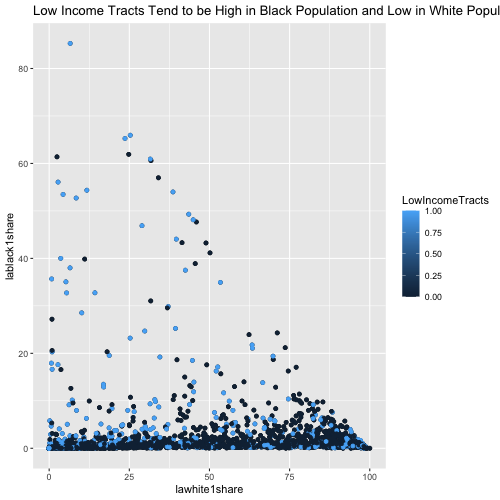

In [14]:
%%R -w 500 -h 500

# plot ”lawhite1share“ with "lablack1share" together 
df %>% 
  ggplot() +
  aes(x = lawhite1share, y = lablack1share) + 
  geom_point() +
  labs(title = "Low Income Tracts Tend to be High in Black Population and Low in White Population")+
  # add a layer of LowIncomeTracts to the plot
geom_point(aes(color = LowIncomeTracts)) 
# code for scatter plot 1
# be sure to include a meaningful title and subtitle

`geom_smooth()` using formula = 'y ~ x'


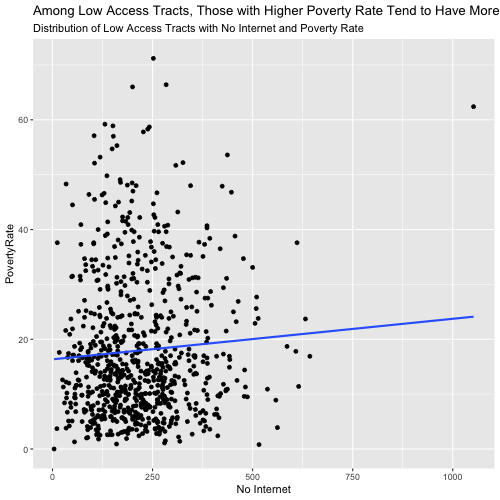

In [20]:
%%R -w 500 -h 500
# plot "LATractsVehicle_20"=1 with "No Internet" and "PovertyRate"
df %>%
  filter(LATractsVehicle_20 == 1) %>%
  ggplot() +
  aes(x = `No Internet`, y = PovertyRate) + 
  geom_point() + 
  # add reqrression line
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Among Low Access Tracts, Those with Higher Poverty Rate Tend to Have More Households with No Internet",
  subtitle = "Distribution of Low Access Tracts with No Internet and Poverty Rate") 
# code for scatter plot 2
# be sure to include a meaningful title and subtitle

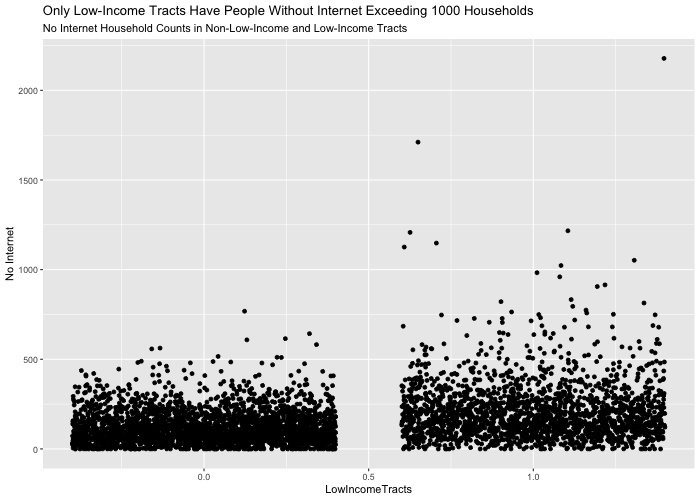

In [25]:
%%R -w 700 -h 500
df %>% ggplot() +
  aes(x = LowIncomeTracts, y = `No Internet`) + 
  geom_jitter() + 
  labs(title = "Only Low-Income Tracts Have People Without Internet Exceeding 1000 Households",
  subtitle = "No Internet Household Counts in Non-Low-Income and Low-Income Tracts")
# code for scatter plot 3
# be sure to include a meaningful title and subtitle